# Final Exam - SS 3850G / CS 4414B - Undergraduate students

## Student ID: 250890594 (XX / 100)

## General comments

This Final integrates knowledge and skills acquired during the whole semester. You are allowed to use any document and source on your computer and look up documents on the internet. **You are NOT allowed to share documents, or communicate in any other way with people inside or outside the class during the exam.** To finish the exam in the alloted 3 hrs, you will have to work efficiently. **Read the entirety of each question carefully.** You need to be signed into the Final Zoom session during the entire exam with your video on and pointed at yourself. 

You need to submit the final by the due date (17:00) on OWL in the Test & Quizzes / Final section where you downloaded the data set and notebook. Late submission will be scored with 0 pts, unless you have received special accommodations. To avoid technical difficulties, start your submission at latest five to ten minutes before the deadline. To be sure, you can also submit multiple versions - only the latest version will be graded.  

Most question demand a **written answer** - answer these in a full English sentence. 

For your Figures, ensure that all axes are labeled in an informative way. 

Ensure that your code runs correctly by choosing "Kernel -> Restart and Run All" before submitting. 

### Additional Guidance

If at any point you are asking yourself "are we supposed to...", then *write your assumptions clearly in your exam and proceed according to those assumptions.*

Good luck!

In [1]:
## Preliminaries
# Sets up the environment by importing 
# pandas, numpy, matplotlib, searborn, sklearn, scipy.
# No other packages are allowed in solving the final.   

# Basics
import pandas as pd
import numpy as np

# Models and metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset

# Plotting
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data set

Credit scoring is one of the most common applications of statistical modeling / data science techniques. Predicting whether a potential borrower will repay their obligations or will not do so (called *default*) is one of the key activities in personal and small business lending.

During this exam, you will work with a sample of granted loans taken from a local bank, as part of a financial competition that ran back in 2013. The company sponsoring it made available the following variables:

1. SeriousDlqin2yrs (binary, target variable): 1 if the borrower experienced 90 days past due delinquency or worse (default), 0 otherwise.
2. RevolvingUtilizationOfUnsecuredLines (percentage): Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits. 
3. age (integer): Age of borrower in years. 
4. NumberOfTime30-59DaysPastDueNotWorse (integer): Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
5. DebtRatio (percentage): Monthly debt payments, alimony, living costs divided by monthy gross income.
6. NumberOfOpenCreditLinesAndLoans (integer): Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards).
7. NumberOfTimes90DaysLate (integer): Number of times borrower has been 90 days or more past due.
8. NumberRealEstateLoansOrLines (integer): Number of mortgage and real estate loans including home equity lines of credit. 
9. NumberOfTime60-89DaysPastDueNotWorse (integer): Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
10. NumberOfDependents (integer): Number of dependents in family excluding themselves (spouse, children etc.)

You get a sample of 1000 cases with a 50% default rate. The cases are stored in the attached csv file (```gsc_sample.csv```)

With this information, execute the following tasks using your knowledge from the course.


In [2]:
# Uncomment this line if using cloud installation (Colab or others)
# !gdown https://drive.google.com/uc?id=1_9tztEp7v1wBJTH91xZpTS_QDgdp4mN0

In [3]:
# Read the data
gsc_sample = pd.read_csv('~/Desktop/gsc_sample.csv')
gsc_sample.describe()

,SeriousDlqin2yrs,age,NumberOfTime3059DaysPastDueNotWorse,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents,RevolvingUtilizationOfUnsecuredLines,DebtRatio
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.50000,49.632000,0.757000,6744.346000,8.670000,0.42700,1.026000,0.330000,0.92200,0.468928,0.365071
std,0.50025,13.829166,3.303462,11396.666095,5.065645,3.22041,1.152672,3.170986,1.18715,0.403894,0.325817
min,0.00000,22.000000,0.000000,1100.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.00000,39.000000,0.000000,3457.750000,5.000000,0.00000,0.000000,0.000000,0.00000,0.080844,0.145849
50%,0.50000,49.000000,0.000000,5180.000000,8.000000,0.00000,1.000000,0.000000,0.00000,0.374469,0.291640
75%,1.00000,59.000000,1.000000,8000.000000,11.000000,0.00000,2.000000,0.000000,2.00000,0.877077,0.489728
max,1.00000,92.000000,98.000000,250000.000000,30.000000,98.00000,9.000000,98.000000,6.00000,2.297612,2.639328


## Task 1 (30 pts)
Before we start working on a predictive models for whether somebody will default on a loan or not, in task 1 we will first build a model to predict the typical monthly income. Income is notoriously difficult to obtain, as people may have different sources of income, so it holds value to create income prediction models. Ultimately this model maybe useful in spotting whether somebody is in the typical income bracket. One of the main predictors of income is age, so we focus on this variable and later consider some additional variables. 

### Question 1.1 (5pts)
* Generate a bivariate scatter plot of age (x-axis) and Monthly Income (y-axis). You should be able to see two extreme observations. [1pt]
* Exclude the two observations from the data set and regenerate your bivariate scatter plot. [1pt]
* **Written answer: Is the distribution of Monthly income symmetric or skewed?** [1pt]
* **Written answer: Given the presence of outliers and the shape of the distribution of the target variable, would you prefer a L2-loss or an L1-loss for your regression model? 
How will the prediction of each of these models differ?Which technique will give a prediction that is closer to the median income?** [2pts]


<AxesSubplot:xlabel='age', ylabel='MonthlyIncome'>

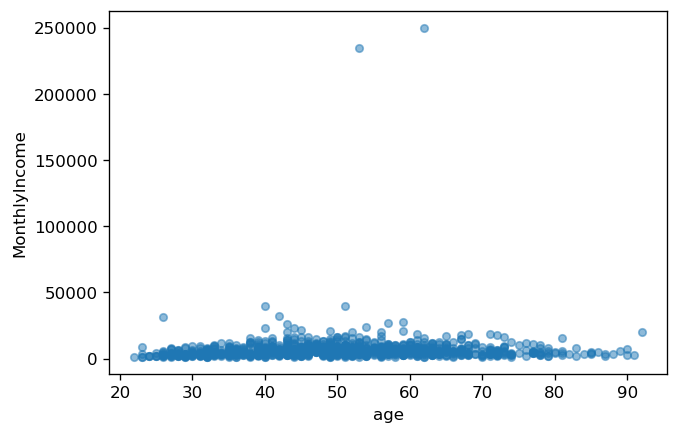

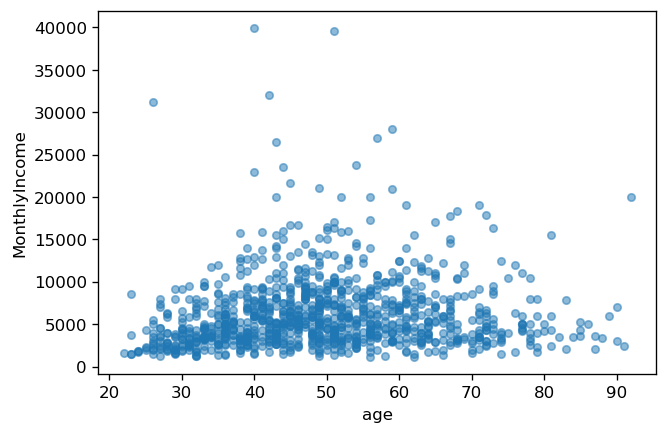

In [4]:
# Your code here. You can add as many cells as you want.
fig, ax = plt.subplots(dpi=120)
gsc_sample.plot.scatter('age','MonthlyIncome', ax = ax, alpha = 0.5)
fig1, ax1 = plt.subplots(dpi=120)
gsc_sample_1 = gsc_sample[(gsc_sample.MonthlyIncome<100000)]
gsc_sample_1.plot.scatter('age','MonthlyIncome', ax = ax1, alpha = 0.5)

**Your written answers here**
The distribution of Monthly income is skewed since more data points concentrate around the left portion.
L1-loss is preferred beacuse L2-loss is more sensitive to outliers, while L1-loss is robust against outliers.L1-loss will give a prediction that is closer to the median income.

### Question 1.2 (13pts)
As a solution to the distribution of Monthly income, you chose the following practical solution: 
* Exclude the two highest earning cases.
* Transform the target variable from income to the natural logarithm of the monthly income.

Implement these two steps. All subsequent questions in this task will be done over this reduced and transformed data set 

To build and evaluate a baseline model take the following steps: 
* Split the data into an equal-sized training and test set (500 observations each). Use a random_state of 1.
* Build a model that predicts the log income as a quadratic function of age. To get full points, implement the feature construction and model in a pipeline  
* Fit the model using an squared-error loss (L2)
* Plot the training data and the fit of the model
* Calculate and report the mean-squared error for the test set 
* Using the Central limit theorem or bootstrap, calculate and report the 95% Confidence interval of the mean test error

mean-squared error is  0.32486671282816854
95%  Confidence interval of the mean test error is  [0.28389998 0.36583344]


<ipython-input-5-479101370da7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gsc_sample_1['logincome'] = np.log(gsc_sample_1.MonthlyIncome)


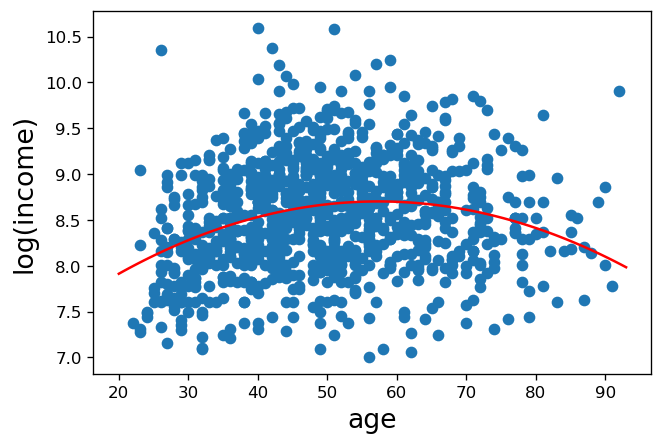

In [5]:
# Your code here. You can add as many cells as you want.
gsc_sample_1['logincome'] = np.log(gsc_sample_1.MonthlyIncome)
dftrain, dftest = train_test_split(gsc_sample_1,test_size=0.5,random_state=1)

model1 = Pipeline([
    ('poly trans',PolynomialFeatures(degree=2, include_bias=False)),
    ('Linear_reg',LinearRegression())
])

X_train = dftrain.age.values.reshape(-1,1)
y_train = dftrain.logincome.values
model1.fit(X_train,y_train)

fig, ax = plt.subplots(dpi = 120)
plt.scatter(x=gsc_sample_1.age,y=gsc_sample_1.logincome)

grid = np.linspace(20,93,100).reshape(-1,1)
type(grid)
xn = grid
yn = model1.predict(xn)
ax.plot(grid, yn, color = 'red')
ax.set_xlabel('age', fontsize = 16)
ax.set_ylabel('log(income)', fontsize = 16)
X_test = dftest.age.values.reshape(-1,1)
y_test = dftest.logincome.values

ypred = model1.predict(X_test)
mse = ((ypred-y_test)**2).mean()
print('mean-squared error is ', mse)

testerror = (ypred-y_test)**2
mu = testerror.mean()
test_ci = mu + 1.96 * np.std(testerror) / np.sqrt(len(testerror)) * np.array([-1, 1])
print('95%  Confidence interval of the mean test error is ',test_ci)

### Question 1.3 (6pts)
Now increase the model complexity by using a 5th-order polynomial on age to predict monthly income. 
As in Question 1.2, plot the fit on the training data and report the mean squared error on the test data. 

**Written answer: Does a 5th-order polynomial offer a better model than the quadratic model in Question 1.2? Which model would you prefer? Justify your answer.**


mean-squared error is  0.32438792509986136
95%  Confidence interval of the mean test error is  [0.28340965 0.3653662 ]


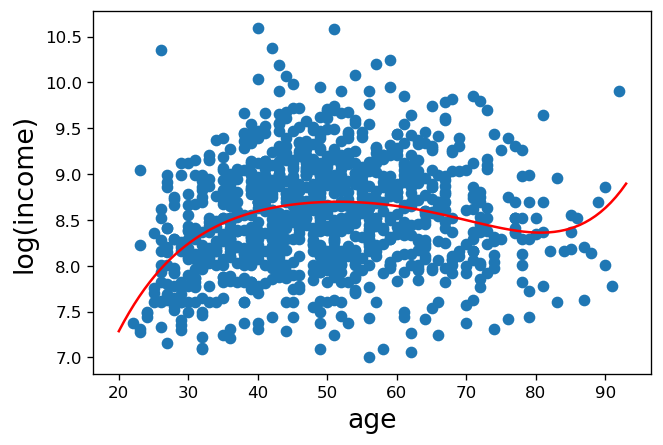

In [6]:
# Your code here. You can add as many cells as you want.
model2 = Pipeline([
    ('poly trans',PolynomialFeatures(degree=5, include_bias=False)),
    ('Linear_reg',LinearRegression())
])

X_train = dftrain.age.values.reshape(-1,1)
y_train = dftrain.logincome.values
model2.fit(X_train,y_train)

fig, ax = plt.subplots(dpi = 120)
plt.scatter(x=gsc_sample_1.age,y=gsc_sample_1.logincome)

grid = np.linspace(20,93,100).reshape(-1,1)
type(grid)
xn = grid
yn = model2.predict(xn)
ax.plot(grid, yn, color = 'red')
ax.set_xlabel('age', fontsize = 16)
ax.set_ylabel('log(income)', fontsize = 16)
X_test = dftest.age.values.reshape(-1,1)
y_test = dftest.logincome.values

ypred = model2.predict(X_test)
mse = ((ypred-y_test)**2).mean()
print('mean-squared error is ', mse)

testerror = (ypred-y_test)**2
mu = testerror.mean()
test_ci = mu + 1.96 * np.std(testerror) / np.sqrt(len(testerror)) * np.array([-1, 1])
print('95%  Confidence interval of the mean test error is ',test_ci)

**Your written answer here**
5th-order polynomial model does offer a slightly better model than the quadratic model in Question 1.2, this is because the mean-squared error for model2 is slightly lower the mean-squared error for model1
(0.32486671282816854>0.32438792509986136), however, I would still prefer the first model since higher order might cause the overfit of training data, and the improvement from order 2 to order 5 is very small, in order to avoid overfitting and considering the improvement is not that great, i would stick with the first model.

### Question 1.4 (6pts)
You boss tells you that he only wants to use your predictive algorithm, if the predicted mean squared test error on a completely novel data set is lower than 0.33 and the 95% confidence interval does not include that value. Since you have not achieved this so far, you give your code, the training and test data set to a colleague of yours (Carl). He uses your code to play around with the number of polynomial terms for age, numberOfDependents, as well as the number and form of interaction terms. Finally he finds a model including 25 features that minimizes the test error. He then conducts a boostrap analysis to obtain a 95% confidence interval on that test error. In his final report he writes: 

*The final model has a predicted test error on unseen data of 0.29. The 95% confidence internal is 0.26 - 0.32 and the new algorithm should therefore meet the required criterion of producing a squared error of lower than 0.33 on novel data with high certainty.*  

**Written answer:  What is the problem with Carl's approach and statement? What would you have to change in the model fitting / selection / evaluation procedure to fix the problem?** 

**Your answer here**
Carl's polynomial term is too high, 25 features is way too much for a predictive model, such a high polynomial number will result in overfit of data, the squared error will definitely decrease as the polynomial term gets larger and larger, however it might not perform as well in the test set.I would make a plot of polynomial term vs. squared error to evaluate the optimal number of polynomial terms.

## Task 2: Tree-based ensemble (40 pts)

Now we will begin to model default. We will model it using a tree-based ensemble. After careful consideration, you have decided to use an XGBoosting model to create it.

### Question 2.1: XGB vs Random Forest (5 pts)

**Written answer: Why do you think XGBoosting is a better alternative than Random Forests for this particular database? Answer in terms of the number of cases, the number of variables and the properties of each model.**

**Your answer here**
The XGBoosting is a better alternative than Random Forests for this particular database because:
1.this model have large number of cases in training data(700)
2.the number of cases is much greater than the number of variables (700>10)
3.the database only have numerical features, which is suitable for XGBoosting.
4.XGBoosting is suitable for weak learners.
Random Forest is a bagging algorithm, which is suitable when you have small number of cases so you will need to boostrap the database and make up with more cases.

### Question 2.2: Finding the best XGB model (20 pts)

One of your colleagues has previously done an analysis of the best parameters that can be used for the model, and has limited the choice to four potential configurations: a max_depth parameter of 3, a learning_rate value of either 0.01 or 0.1, and an n_estimators (number of trees) of either 50 trees or 200 trees. Your colleague used a random_state seed value of 20212004 everywhere possible. All the other parameters can be set at the values appropriate for a binary model seen in the course.

You will now determine which of these configurations is the best for your work. For this:

a. Starting from the original data (i.e. not using the output from Task 1), create a train / test split leaving 300 cases in the test set. (2 pts)

b. Create a parameter grid that can test the values that you need to test. (5 pts)

c. Run a grid-search using this configuration and get the values of the best parameters. Use the whole training set you created in a for this search, do not create a smaller sample. Show the value of the best parameters. (*Hint: As you will be using the whole training set, you can get the best estimator directly from the ```GridSearchCV``` object by setting the option ```refit=True```. The best estimator is then stored in the ```GRID_SEARCH_OBJECT.best_estimator_``` property, where ```GRID_SEARCH_OBJECT``` is the name of your GridSearchCV object*). (13 pts)

In [7]:
# Your code here. You can add as many cells as you want.
XGB = XGBClassifier(max_depth=3,                 # Depth of each tree
                            learning_rate=0.1,            # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=100,             # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            n_jobs=2,                     # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=1,                  # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            scale_pos_weight=1,           # Balancing of positive and negative weights.
                            base_score=0.5,               # Global bias. Set to average of the target rate.
                            random_state=20201107,        # Seed
                            missing=None                  # How are nulls encoded?
                            )
# Create train / test split
X = gsc_sample.drop(['SeriousDlqin2yrs'],axis = 'columns')
y = gsc_sample.SeriousDlqin2yrs
x_train, x_test, y_train, y_test = train_test_split(X, # X
                                                    y,  # y
                                                    test_size = 300,           # Size of test
                                                    random_state = 20212004)   # Seed

#  Create a parameter grid that can test the values that you need to test. (5 pts)
param_grid = dict({'n_estimators': [50,200],
                   'learning_rate' : [0.01, 0.1]
                  })
GridXGB = GridSearchCV(XGB,        # Original XGB. 
                       param_grid,          # Parameter grid
                       cv = 3,              # Number of cross-validation folds.  
                       scoring = 'neg_root_mean_squared_error',   # How to rank outputs.
                       n_jobs = -1,         # Parallel jobs. -1 is "all you have" Careful, never clash threads. Either paralellize XGB OR this, NOT both.
                       refit = True,       # If refit at the end with the best. We'll do it manually.
                       verbose = 1          # If to show what it is doing.
                      )
GridXGB.fit(x_train,y_train)
GridXGB.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.2s finished


{'learning_rate': 0.01, 'n_estimators': 200}

### Question 2.3: Evaluating the model (10 pts)

Now that you have a model, you must check how well it works and evaluate it in the context of this problem. Perform the following tasks:

a. Apply the best model to the test set to obtain the probability of default for each element. (2pt)

b. Create a ROC curve plot that shows the value of the AUC you obtained. **Written answer: What can you say about the model performance?** (4pts)

c. Create a variable importance plot showing which variables contribute the most to the model prediction. (4pts)

In [8]:
# Apply to the test set
XGB_best = XGBClassifier(max_depth=3,                 # Depth of each tree
                            learning_rate=0.01,            # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=200,             # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            n_jobs=2,                     # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=1,                  # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            scale_pos_weight=1,           # Balancing of positive and negative weights.
                            base_score=0.5,               # Global bias. Set to average of the target rate.
                            random_state=20201107,        # Seed
                            missing=None                  # How are nulls encoded?
                            )
XGB_best.fit(x_test,y_test)
probTest = XGB_best.predict_proba(x_test)
probTest = probTest[:, 1]
print("probability of default for each element are", probTest)

probability of default for each element are [0.71064186 0.21473844 0.88131356 0.6803755  0.8548101  0.21473844
 0.8468702  0.5490802  0.9049722  0.47183588 0.8998591  0.13570835
 0.13570835 0.6486489  0.17742446 0.15824644 0.7852205  0.42392656
 0.13570835 0.6485434  0.13570835 0.17570205 0.21473844 0.2631596
 0.84921014 0.1292004  0.276041   0.5835836  0.80162364 0.90085757
 0.13570835 0.80224466 0.20460726 0.73173124 0.61946857 0.8986477
 0.17742446 0.13570835 0.19650169 0.16391863 0.48361674 0.21473844
 0.20460726 0.7850459  0.16806976 0.89732975 0.20460726 0.8574142
 0.7318606  0.82145727 0.52115244 0.15824644 0.13570835 0.8551694
 0.84330195 0.89739704 0.2780228  0.5379266  0.13570835 0.6671962
 0.21473844 0.47183588 0.46241695 0.4861063  0.5223189  0.7240463
 0.46596435 0.3970544  0.63166636 0.16945432 0.7685028  0.21473844
 0.4958336  0.40917277 0.78865725 0.7646807  0.7898788  0.13570835
 0.16391863 0.8036475  0.5857607  0.1292004  0.52079296 0.7279618
 0.17570205 0.30474934 0.

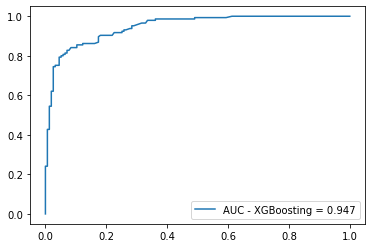

In [9]:
# Plot the ROC curve and show the AUC
# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, probTest)

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = y_test, 
                             y_score = probTest),
               decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="AUC - XGBoosting = " + str(auc))
plt.legend(loc=4)
plt.show()

**Your written answer here**
The model performs pretty well, since we have a great AUC score of 0.947, which indicates that the model can predict the desired result efficiently.

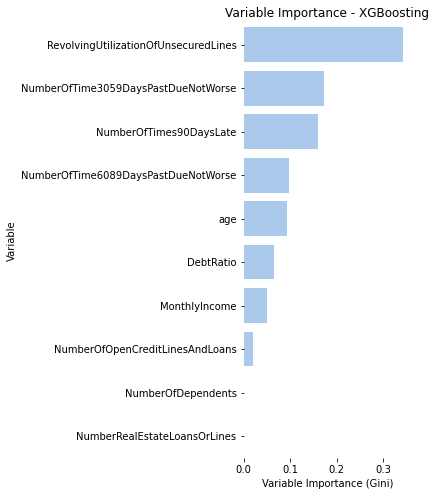

In [10]:
# Create the variable importance plot
data_train, data_test = train_test_split(gsc_sample, test_size = 300,random_state = 20212004) 
importances = XGB_best.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - XGBoosting")
sns.set_color_codes("pastel")
sns.barplot(y=[data_train.iloc[:, 1:].columns[i] for i in indices], x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Gini)")
sns.despine(left=True, bottom=True)

### Question 2.4: Fairness (5 pts)

Your colleague Carl says that you probably neglected to include the full zipcode as a predictive variable in the model. You know this is a bad idea due to fairness concerns. Explain to your colleague what are the issues with including such a variable to make real-world decisions in the context of model fairness. In this context, explain what we would need to see in the model decisions to achieve Demographic Parity, Equalized Opportunities, and Equalized Odds for the protected characteristics (gender, ethnicity, religion, etc).

(*Hint: Remember that the full zipcode allows identifying particular neighborhoods, and those neighborhoods can have specific ethnicities and gender compositions*)

**Your answer here**
If zipcode is included in the model prediction, the model will take zipcode into consideration and make biased prediction towards where a person lives, however, it is not fair to judge a borrower's feature based on where he/she lives, since the address may reflect some demographic feature of that person, such as specific ethnicities and gender compositions.
To achieve Demographic Parity,we will need to achieve the independence of the outcome with respect to the protected attributes.
To achieve Equalized Odds, we will need to matching the TPR and FPR for different values of the protected attributes.
To achieve Equalized Opportunity,the TPR and FPR do not both need to be equal acroos the protected attributes.

## Task 3: Unsupervised learning (30 pts)

After you have corrected him twice, Carl has now argued you should not construct just one model but several ones, as you probably have several disjoint clusters in your data. Your colleague says running a clustering model will clearly show this.

To test your colleague's idea, you propose to run a K-Means model and using dimensionality reduction to plot the resulting analysis.

### Question 3.1 Data normalization (5 pts)

Explain why it is a good idea to normalize the data for a K-Means clustering process. Then train a ```MinMaxScaler``` method over your full dataset ```gsc_sample```, excluding the target variable. Transform the data and make a new Data Frame containing the transformed variables. 

**Your written answer here**
It is a good idea to normalize the data for a K-Means clustering process because if the data is not normalized to the same scale, the clustering method will be dominated by the variables with the highest magnitude, which is not desired.

In [11]:
# Your code here. You can add as many cells as you want.
normalizer = MinMaxScaler()
X = gsc_sample.drop('SeriousDlqin2yrs', axis = "columns")
X_new =  pd.DataFrame(normalizer.fit_transform(X), index=X.index, columns=X.columns)

### Question 3.2 K-Means Clustering (15 pts)

Your colleague has mentioned they think there are between three and five clusters in the data. You decide to run a silhouette analysis over the data to answer these questions. Create a silhouette plot for 3, 4 and 5 clusters and calculate the corresponding silhouette scores. Use a random seed of 20210420 for your cluster functions.

**Written answer: According to the silhouette analysis, do you think 3, 4 or 5 clusters provide a better description of the data? Why?**

For n_clusters = 3 The average silhouette_score is : 0.2177
For n_clusters = 4 The average silhouette_score is : 0.2174
For n_clusters = 5 The average silhouette_score is : 0.1999


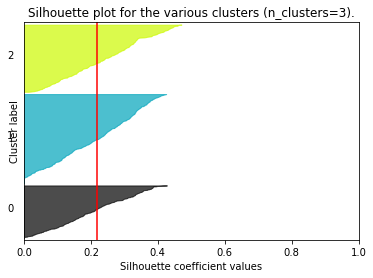

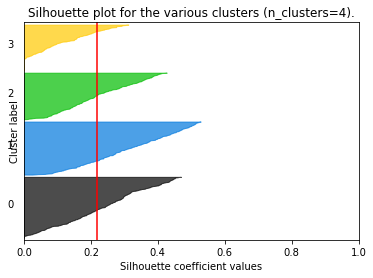

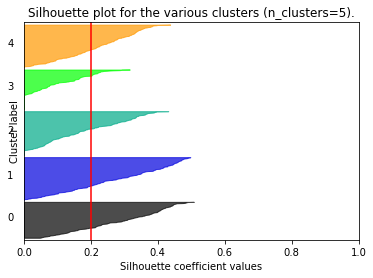

In [12]:
# Your code here. You can add as many cells as you want.
range_n_clusters = [3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([0, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_new) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=20210420)
    cluster_labels = clusterer.fit_predict(X_new)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_new, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is : %.4f"  % silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_new, cluster_labels)

    y_lower = 10
    
    # Iterate over the clusters
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters (n_clusters=%i)." % (n_clusters))
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
     # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="-")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])


**Your written answer here**
We want clusters of similar width and closer to the average, in this case, 3 clusters would provide a better description of the data, since the 3 clusters all have similar width and they are all closer to the average.

### Question 3.3: Visualizing your cluster model (10 pts)

After running the above analysis you have decided a certain number of clusters. However, you are not convinced these clusters are actually well-defined groups. You decide to visualize the clusters to identify whether there are actually any groups at all.

a. Run a PCA model over the normalized data keeping two components. Show the percentage of explained variance of these two components. (5 pts)

b. Create a scatterplot using these two components as axes of the plot, colouring the points of the plot depending on which cluster they belong to. (2 pts)

c. **Written answer: Do you think there are real, distinct clusters in the data? Why or why not? To achieve a good prediction, do you think you need to create a separate predictive model for each cluster? Or would a single predictive model for the entire data set be enough? (3 pts)**

In [13]:
# Your code here. You can add as many cells as you want.
# Calculate PCA
PCA_transformer = PCA(2)
PCA_data = PCA_transformer.fit_transform(X_new)
variances = PCA_transformer.explained_variance_ratio_
variances = np.cumsum(np.round(PCA_transformer.explained_variance_ratio_,decimals=3)*100)
print('The two components explain %.2f%% of the variance' % (np.cumsum(variances)[1]))

The two components explain 86.60% of the variance


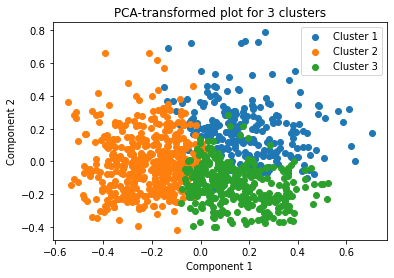

In [14]:
# For three clusters.
n_clusters = 3
clusterer = KMeans(n_clusters=n_clusters, random_state=20210420)
cluster_labels = clusterer.fit_predict(X_new)

# Plot!
for i in range(n_clusters):
    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.scatter(PCA_data[cluster_labels==i, 0], PCA_data[cluster_labels==i, 1], 
                label='Cluster %i' % (i+1))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA-transformed plot for %i clusters' % n_clusters)
plt.legend()

**Your written answer here**
Do you think there are real, distinct clusters in the data? Why or why not? 
Yes, they are real and distinct clusters in the data, because silhouette analysis gives a clear indication of optimal number of clusters.
To achieve a good prediction, do you think you need to create a separate predictive model for each cluster? Or would a single predictive model for the entire data set be enough?
We could definitely create a separate predictive model for each cluster, because if the clustering algorithm is proven to be correct and effienient, a separate predictive model will increase the overall prediction performance.